In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# for modeling
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# machine learning libs
# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier


# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# EDA

Read Data

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
submission =  pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

overall look on the first 10 rows of the data

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


have an overall look on the data 

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


number of rows and columns

In [5]:
train.shape

(891, 12)

trying to understand the numric columns 

            Age      Fare     SibSp     Parch
Age    1.000000  0.096067 -0.308247 -0.189119
Fare   0.096067  1.000000  0.159651  0.216225
SibSp -0.308247  0.159651  1.000000  0.414838
Parch -0.189119  0.216225  0.414838  1.000000


<AxesSubplot:>

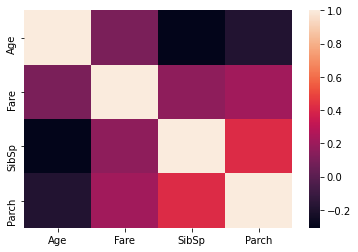

In [6]:
numric_train = train[['Age', 'Fare', 'SibSp','Parch']]
print(numric_train.corr())
sns.heatmap(numric_train.corr())

the number of people died and survived

In [7]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

a function to show a graph of number of the data

In [8]:
def show_figure(coulmn, colors):
    plt.figure()
    plt.bar(list(train[coulmn].value_counts().keys()), list(train[coulmn].value_counts()), color= colors)
    plt.xlabel(coulmn)

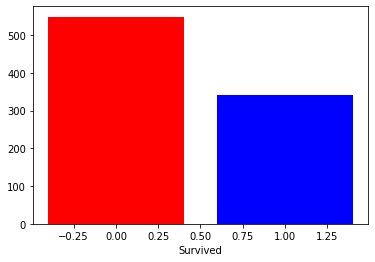

In [9]:
show_figure('Survived',["r", "b"])

the distribution of the Pclass column

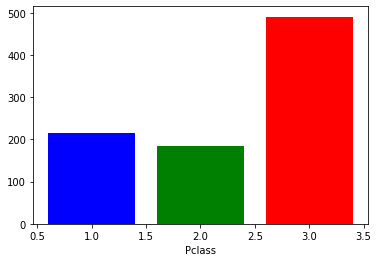

In [10]:
show_figure('Pclass',["r", "b", "g"])

the probabilty of surviving if you were from the the 1st class is higher than 2nd wich is higher than the 3rd

Text(0.5, 1.0, 'Survival Probability by Pclass')

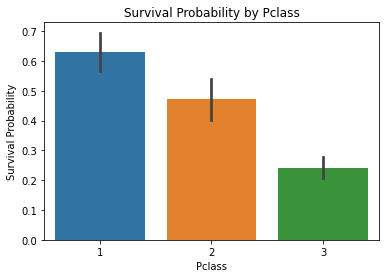

In [11]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Pclass')

females have the highest probabilty in all class

Text(13.394687499999996, 0.5, 'Survival Probability')

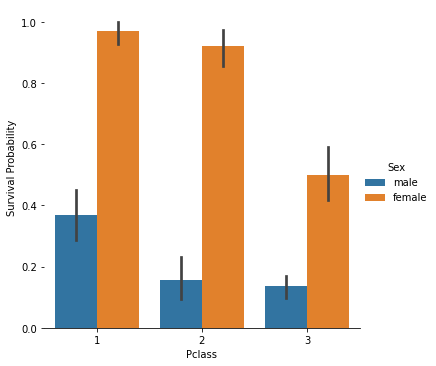

In [12]:
g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')

In [13]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

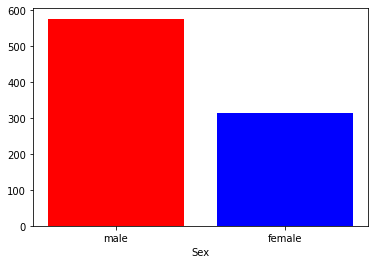

In [14]:
show_figure('Sex',["r", "b"])

Text(0.5, 0, 'Age')

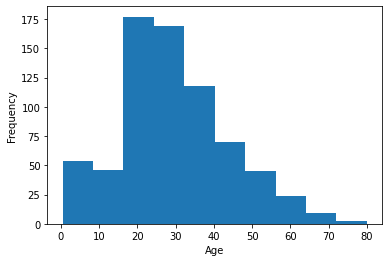

In [15]:
train.Age.plot.hist()
plt.xlabel("Age")

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

the type of the data, so we can manipulate it

In [17]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


understanding the Cabin column

In [19]:
train['Cabin'].head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

add a new column for the title to better understand the characteristics of the data

In [20]:
train['title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Ms                1
Capt              1
Sir               1
Jonkheer          1
Don               1
Mme               1
the Countess      1
Name: title, dtype: int64

change the sex coulmn into an int representation for easier vaisulization
no null values so no need to fill any gabs

In [21]:
train['Sex'] = np.where(train['Sex'] == 'female', 1, 0)
test['Sex'] = np.where(test['Sex'] == 'female', 1, 0)

Detect and drop the outliers from all the numaric columns (Age, SibSp,Parch, Fare)

In [22]:
def detect_outliers(data, n, columns):
    outlier_indices = [] 
    for c in columns: 
        Q1 = np.percentile(data[c], 25)
        Q3 = np.percentile(data[c], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

train_outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
test_outliers_to_drop = detect_outliers(test, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
train = train.drop(train_outliers_to_drop, axis = 0).reset_index(drop = True)
test = test.drop(test_outliers_to_drop, axis = 0).reset_index(drop = True)

check how many rows were dropped from the date (10 rows)

In [23]:
train.shape , test.shape

((881, 13), (418, 11))

converting the content of train[Embarek] column into numbers, for easy processing and visualisation

S -> 0
C -> 1
Q -> 2

In [24]:
train['Embarked'] = np.where(train['Embarked'] == 'S', 0,train['Embarked'] )
train['Embarked'] = np.where(train['Embarked'] == 'C', 1,train['Embarked'] )
train['Embarked'] = np.where(train['Embarked'] == 'Q', 2,train['Embarked'] )

test['Embarked'] = np.where(test['Embarked'] == 'S', 0,test['Embarked'] )
test['Embarked'] = np.where(test['Embarked'] == 'C', 1,test['Embarked'] )
test['Embarked'] = np.where(test['Embarked'] == 'Q', 2,test['Embarked'] )



In [25]:
sum(train['Embarked'].isnull()), sum(test['Embarked'].isnull()) 

(2, 0)

check for gaps in th Cabin column

In [26]:
sum(train['Cabin'].isnull()), sum(test['Cabin'].isnull())

(680, 327)

searching for gaps in th Age column (**127 gap**)

In [27]:
sum(train['Age'].isnull()), sum(test['Age'].isnull())

(170, 86)

# Data preprocessing 

check for the gaps in the code

In [28]:
train.isnull().sum() , test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            170
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          680
 Embarked         2
 title            0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

drop the cabin column from the data because the gap percentage is too high

In [29]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [30]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

drop the name column

In [31]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

fill the Embarked column gaps with the mode of the column data

In [32]:
train_embarked_mode_of_nonSurvivor = train['Embarked'].where(train["Survived"] == 0).dropna().mode()[0]
train_embarked_mode_of_Survivor = train['Embarked'].where(train["Survived"] == 1).dropna().mode()[0]
train['Embarked'].fillna(train_embarked_mode_of_nonSurvivor, inplace = True)

test_embarked_mode = test['Embarked'].dropna().mode()[0]
test['Embarked'].fillna(test_embarked_mode, inplace = True)



check if the Embarked column gaps were filled & the cabin column was dropped

In [33]:
train.isnull().sum() , test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Sex              0
 Age            170
 SibSp            0
 Parch            0
 Fare             0
 Embarked         0
 title            0
 dtype: int64,
 PassengerId     0
 Pclass          0
 Sex             0
 Age            86
 SibSp           0
 Parch           0
 Fare            1
 Embarked        0
 dtype: int64)

drop the title column I added before, the source of the Error |(

In [34]:
train = train.drop(['title'], axis = 1)

fill the Age column with the median of the column

In [35]:
age_median_of_nonSurvivor = train['Age'].where(train["Survived"] == 0).dropna().median()
age_median_of_Survivor = train['Age'].where(train["Survived"] == 1).dropna().median()
train['Age'].fillna(age_median_of_nonSurvivor, inplace = True)

test_age_median = test['Age'].dropna().median()
test['Age'].fillna(test_age_median, inplace = True)

fill the Fare column with the median of the column

In [36]:
test_fair_median = test['Fare'].dropna().median()
test['Fare'].fillna(test_fair_median, inplace = True)

In [37]:
train.isnull().sum(), test.isnull().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Embarked       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Embarked       0
 dtype: int64)

In [38]:
train.shape, test.shape

((881, 9), (418, 8))

dropthe passengerid column, will not be used in th processs

In [39]:
train = train.drop('PassengerId', axis = 1)

drop the survived column from both the train data and test data

In [40]:
x_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
x_test = test.drop('PassengerId', axis = 1).copy()

# Modeling

In [41]:
x_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,2.307605,0.350738,29.397469,0.455165,0.363224,31.121566,0.365494
std,0.835055,0.477472,13.085186,0.871571,0.791839,47.996249,0.638100
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,30.500000,1.000000
max,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [42]:
x_train.shape, y_train.shape, x_test.shape

((881, 7), (881,), (418, 7))

In [43]:
x_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,2.307605,0.350738,29.397469,0.455165,0.363224,31.121566,0.365494
std,0.835055,0.477472,13.085186,0.871571,0.791839,47.996249,0.638100
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,30.500000,1.000000
max,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [44]:
x_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.599282,0.447368,0.392344,35.576535,0.464115
std,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.685516
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [45]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,29.599282,0.447368,0.392344,35.576535,0.464115
std,120.810458,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.685516
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,1.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


**1. Naive Bayes** (0.79)

In [46]:
gnb = GaussianNB()
cv_gnb = cross_val_score(gnb,x_train,y_train,cv=5)
print(cv_gnb)
print(cv_gnb.mean())

[0.76836158 0.78977273 0.79545455 0.78409091 0.79545455]
0.7866268618387262


**2. Logistic regression** (0.78)

In [47]:
lr = LogisticRegression(max_iter = 2000)
cv_lr = cross_val_score(lr,x_train,y_train,cv=5)
print(cv_lr)
print(cv_lr.mean())

[0.78531073 0.78977273 0.77840909 0.75568182 0.82386364]
0.7866076014381099


**3. Decision Tree** (0.73)

In [48]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv_dt = cross_val_score(dt,x_train,y_train,cv=5)
print(cv_dt)
print(cv_dt.mean())

[0.73446328 0.78977273 0.80681818 0.75568182 0.80681818]
0.7787108371854135


**4. K Nearest Neighbor** (0.545)

In [49]:
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn,x_train,y_train,cv=5)
print(cv_knn)
print(cv_knn.mean())

[0.63841808 0.65909091 0.68181818 0.71590909 0.72159091]
0.6833654340010271


**5. Random Forest** (0.802)

In [50]:
rf = RandomForestClassifier(random_state = 1)
cv_rf = cross_val_score(rf,x_train,y_train,cv=5)
print(cv_rf)
print(cv_rf.mean())


[0.79096045 0.80681818 0.85795455 0.76704545 0.82386364]
0.809328454031844


**6. Support Vector Classifier** (0.645)

In [51]:
svc = SVC(probability = True)
cv_xgb = cross_val_score(svc,x_train,y_train,cv=5)
print(cv_xgb)
print(cv_xgb.mean())

[0.57062147 0.72727273 0.68181818 0.69886364 0.70454545]
0.6766242937853107


# model evaluation 

In [52]:
models = pd.DataFrame({'Model': ['Naive Bayes', 'KNN', 'Logistic Regression', 
                                 'Random Forest','Support Vector Classifier', 'DecisionTreeClassifier' ],
                       'Score': [cv_gnb.mean()*100, cv_knn.mean()*100,cv_lr.mean()*100, cv_rf.mean()*100, cv_xgb.mean()*100, cv_dt.mean() *100 ]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,80.932845
1,Naive Bayes,78.662686
2,Logistic Regression,78.660760
3,DecisionTreeClassifier,77.871084
4,KNN,68.336543
5,Support Vector Classifier,67.662429


In [53]:

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())


len(classifiers)

6

the loop works but I still get an error, couldn't find a solution for it so I ignored it for now

In [54]:

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring = 'accuracy', cv = 6))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


checking the above cell actually works

In [55]:
cv_results

[array([0.76870748, 0.78911565, 0.80952381, 0.7755102 , 0.79591837,
        0.82876712]),
 array([0.61904762, 0.68707483, 0.70748299, 0.70748299, 0.66666667,
        0.76027397]),
 array([0.75510204, 0.78231293, 0.81632653, 0.78911565, 0.7755102 ,
        0.81506849]),
 array([0.56462585, 0.71428571, 0.69387755, 0.68027211, 0.71428571,
        0.70547945]),
 array([0.71428571, 0.76870748, 0.76870748, 0.76870748, 0.76190476,
        0.82191781]),
 array([0.75510204, 0.79591837, 0.8707483 , 0.80952381, 0.7755102 ,
        0.82876712])]

In [56]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [57]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Naive Bayes', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Decission tree','SVC' ]})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.805928,0.037294,SVC
1,0.794590,0.020235,Naive Bayes
2,0.788906,0.021610,Logistic Regression
3,0.767372,0.031168,Decission tree
4,0.691338,0.043062,KNN
5,0.678804,0.052433,Random Forest


tuning the parameters of SVC model, as it is the one with the highest accuracy.

In [58]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

printing the optimal parameters of the modell to be used in the predection process

In [59]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best estimator:  SVC(C=1000, gamma=0.001)


In [60]:

svc = SVC(C = 1000, gamma = 0.001, kernel = 'rbf')
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

85.93

the mean cross validation score

In [61]:
cross_val_score(svc, x_train, y_train, scoring = 'accuracy', cv = 6).mean()

0.7934799490572484

In [62]:
submission.shape

(418, 2)

In [63]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


download the file to my machine.

In [64]:
submit.to_csv("saber.csv", index = False)